In [1]:
#import
from rda_package import rda 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
N_TEST=100
REPLICATES=1

Unable to determine R home: [WinError 2] Le fichier spécifié est introuvable
Unable to determine R library path: Command '('C:\\Program Files\\R\\R-4.1.3\\bin\\Rscript', '-e', 'cat(Sys.getenv("LD_LIBRARY_PATH"))')' returned non-zero exit status 1.


In [ ]:
for i in [1,2,3]:
    for j in [1,2,3]:
        FILENAME=f"stack_c{i}_n0{3*j}.csv"
        folder_in = f'Out/{FILENAME[:-4]}/'
        NOISE=float(0.3*j)
        N_COMPONENTS=int(i)
        rda.synt_rhythmic_data(FILENAME,half_rnd=True,n_test=N_TEST,n_components=N_COMPONENTS,noise=NOISE,replicates=REPLICATES)
        rda.file_rda(folder_in+FILENAME,metrics=True,half_rnd=True,n_components=N_COMPONENTS)

In [2]:
i=3
j=3
filename=f"stack_c{i}_n0{3*j}.csv"
qv = pd.read_csv(f"Out/{filename[:-4]}/qv_{filename[:-4]}.csv")
y = pd.DataFrame([1] * (len(qv)//2), columns=['y'])
y = pd.concat([y,pd.DataFrame([0] * (len(qv)//2), columns=['y'])],ignore_index=True)
qv['y']=y
qv = qv.sample(frac=1).reset_index(drop=True)
qv=qv.drop('CycID',axis=1)
qv

,ARS_qvalue,JTK_qvalue,LS_qvalue,meta2d_qvalue,Cosinor_qvalue,Cosinor1_qvalue,Cosinor1(amp)_qvalue,Rain_qvalue,y
0,0.863001,1.000000,1.000000,1.000000,0.847987,0.983550,7.666375e-01,0.968457,0
1,0.634789,1.000000,1.000000,1.000000,0.988519,0.910573,5.519319e-01,0.968457,0
2,0.011549,0.046945,0.447294,0.000810,0.825579,0.006779,8.058883e-05,0.000622,1
3,0.000675,0.024665,0.373169,0.000001,0.009768,0.001247,1.789801e-07,0.000870,1
4,0.006714,0.024665,0.373169,0.000093,0.864546,0.003104,7.804171e-06,0.000597,1
...,...,...,...,...,...,...,...,...,...
9995,0.055169,0.595633,1.000000,0.177856,0.117145,0.087149,1.312906e-02,0.007202,1
9996,0.050125,0.455302,0.730937,0.072153,0.106163,0.024795,1.461392e-03,0.007861,1
9997,0.009264,0.061435,0.443307,0.000875,0.212474,0.017721,7.441340e-04,0.003667,1
9998,0.277899,1.000000,1.000000,1.000000,0.917195,0.308008,8.879054e-02,0.602343,0


In [3]:
from sklearn.metrics import confusion_matrix
def plot_result(grid,X_test,y_test):
    y_pred = grid.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
    print('Score : ',grid.score(X_test,y_test),'\n',grid.best_estimator_)

In [4]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(qv.drop('y',axis=1),qv['y'], test_size=0.5)
print(X_train,y_train)
X_train

      ARS_qvalue  JTK_qvalue  LS_qvalue  meta2d_qvalue  Cosinor_qvalue  \
4388    0.099726    0.595633   1.000000       0.264767        0.064010   
3813    0.464350    1.000000   1.000000       1.000000        0.132372   
2904    0.011549    0.305999   0.589698       0.009351        0.007653   
6739    0.471246    1.000000   1.000000       1.000000        0.946795   
3791    0.035236    0.155089   0.633100       0.016228        0.049317   
...          ...         ...        ...            ...             ...   
3278    0.979919    1.000000   1.000000       1.000000        0.995904   
7428    0.022512    0.080616   0.493299       0.003568        0.134952   
9765    0.002340    0.178386   0.542202       0.000669        0.003040   
584     0.148584    0.986771   1.000000       0.642696        0.297108   
5377    0.923243    1.000000   1.000000       1.000000        0.304288   

      Cosinor1_qvalue  Cosinor1(amp)_qvalue  Rain_qvalue  
4388         0.254634              0.067224     0.30

,ARS_qvalue,JTK_qvalue,LS_qvalue,meta2d_qvalue,Cosinor_qvalue,Cosinor1_qvalue,Cosinor1(amp)_qvalue,Rain_qvalue
4388,0.099726,0.595633,1.000000,0.264767,0.064010,0.254634,0.067224,0.309153
3813,0.464350,1.000000,1.000000,1.000000,0.132372,0.418029,0.139653,0.443114
2904,0.011549,0.305999,0.589698,0.009351,0.007653,0.018989,0.000864,0.009035
6739,0.471246,1.000000,1.000000,1.000000,0.946795,0.458096,0.160125,0.259100
3791,0.035236,0.155089,0.633100,0.016228,0.049317,0.020990,0.001052,0.004508
...,...,...,...,...,...,...,...,...
3278,0.979919,1.000000,1.000000,1.000000,0.995904,0.929893,0.590483,0.968457
7428,0.022512,0.080616,0.493299,0.003568,0.134952,0.008911,0.000161,0.003192
9765,0.002340,0.178386,0.542202,0.000669,0.003040,0.015343,0.000553,0.012092
584,0.148584,0.986771,1.000000,0.642696,0.297108,0.359923,0.111532,0.271551


Score :  0.9612 
 DecisionTreeClassifier(criterion='entropy', max_depth=3)


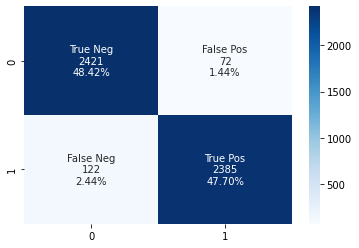

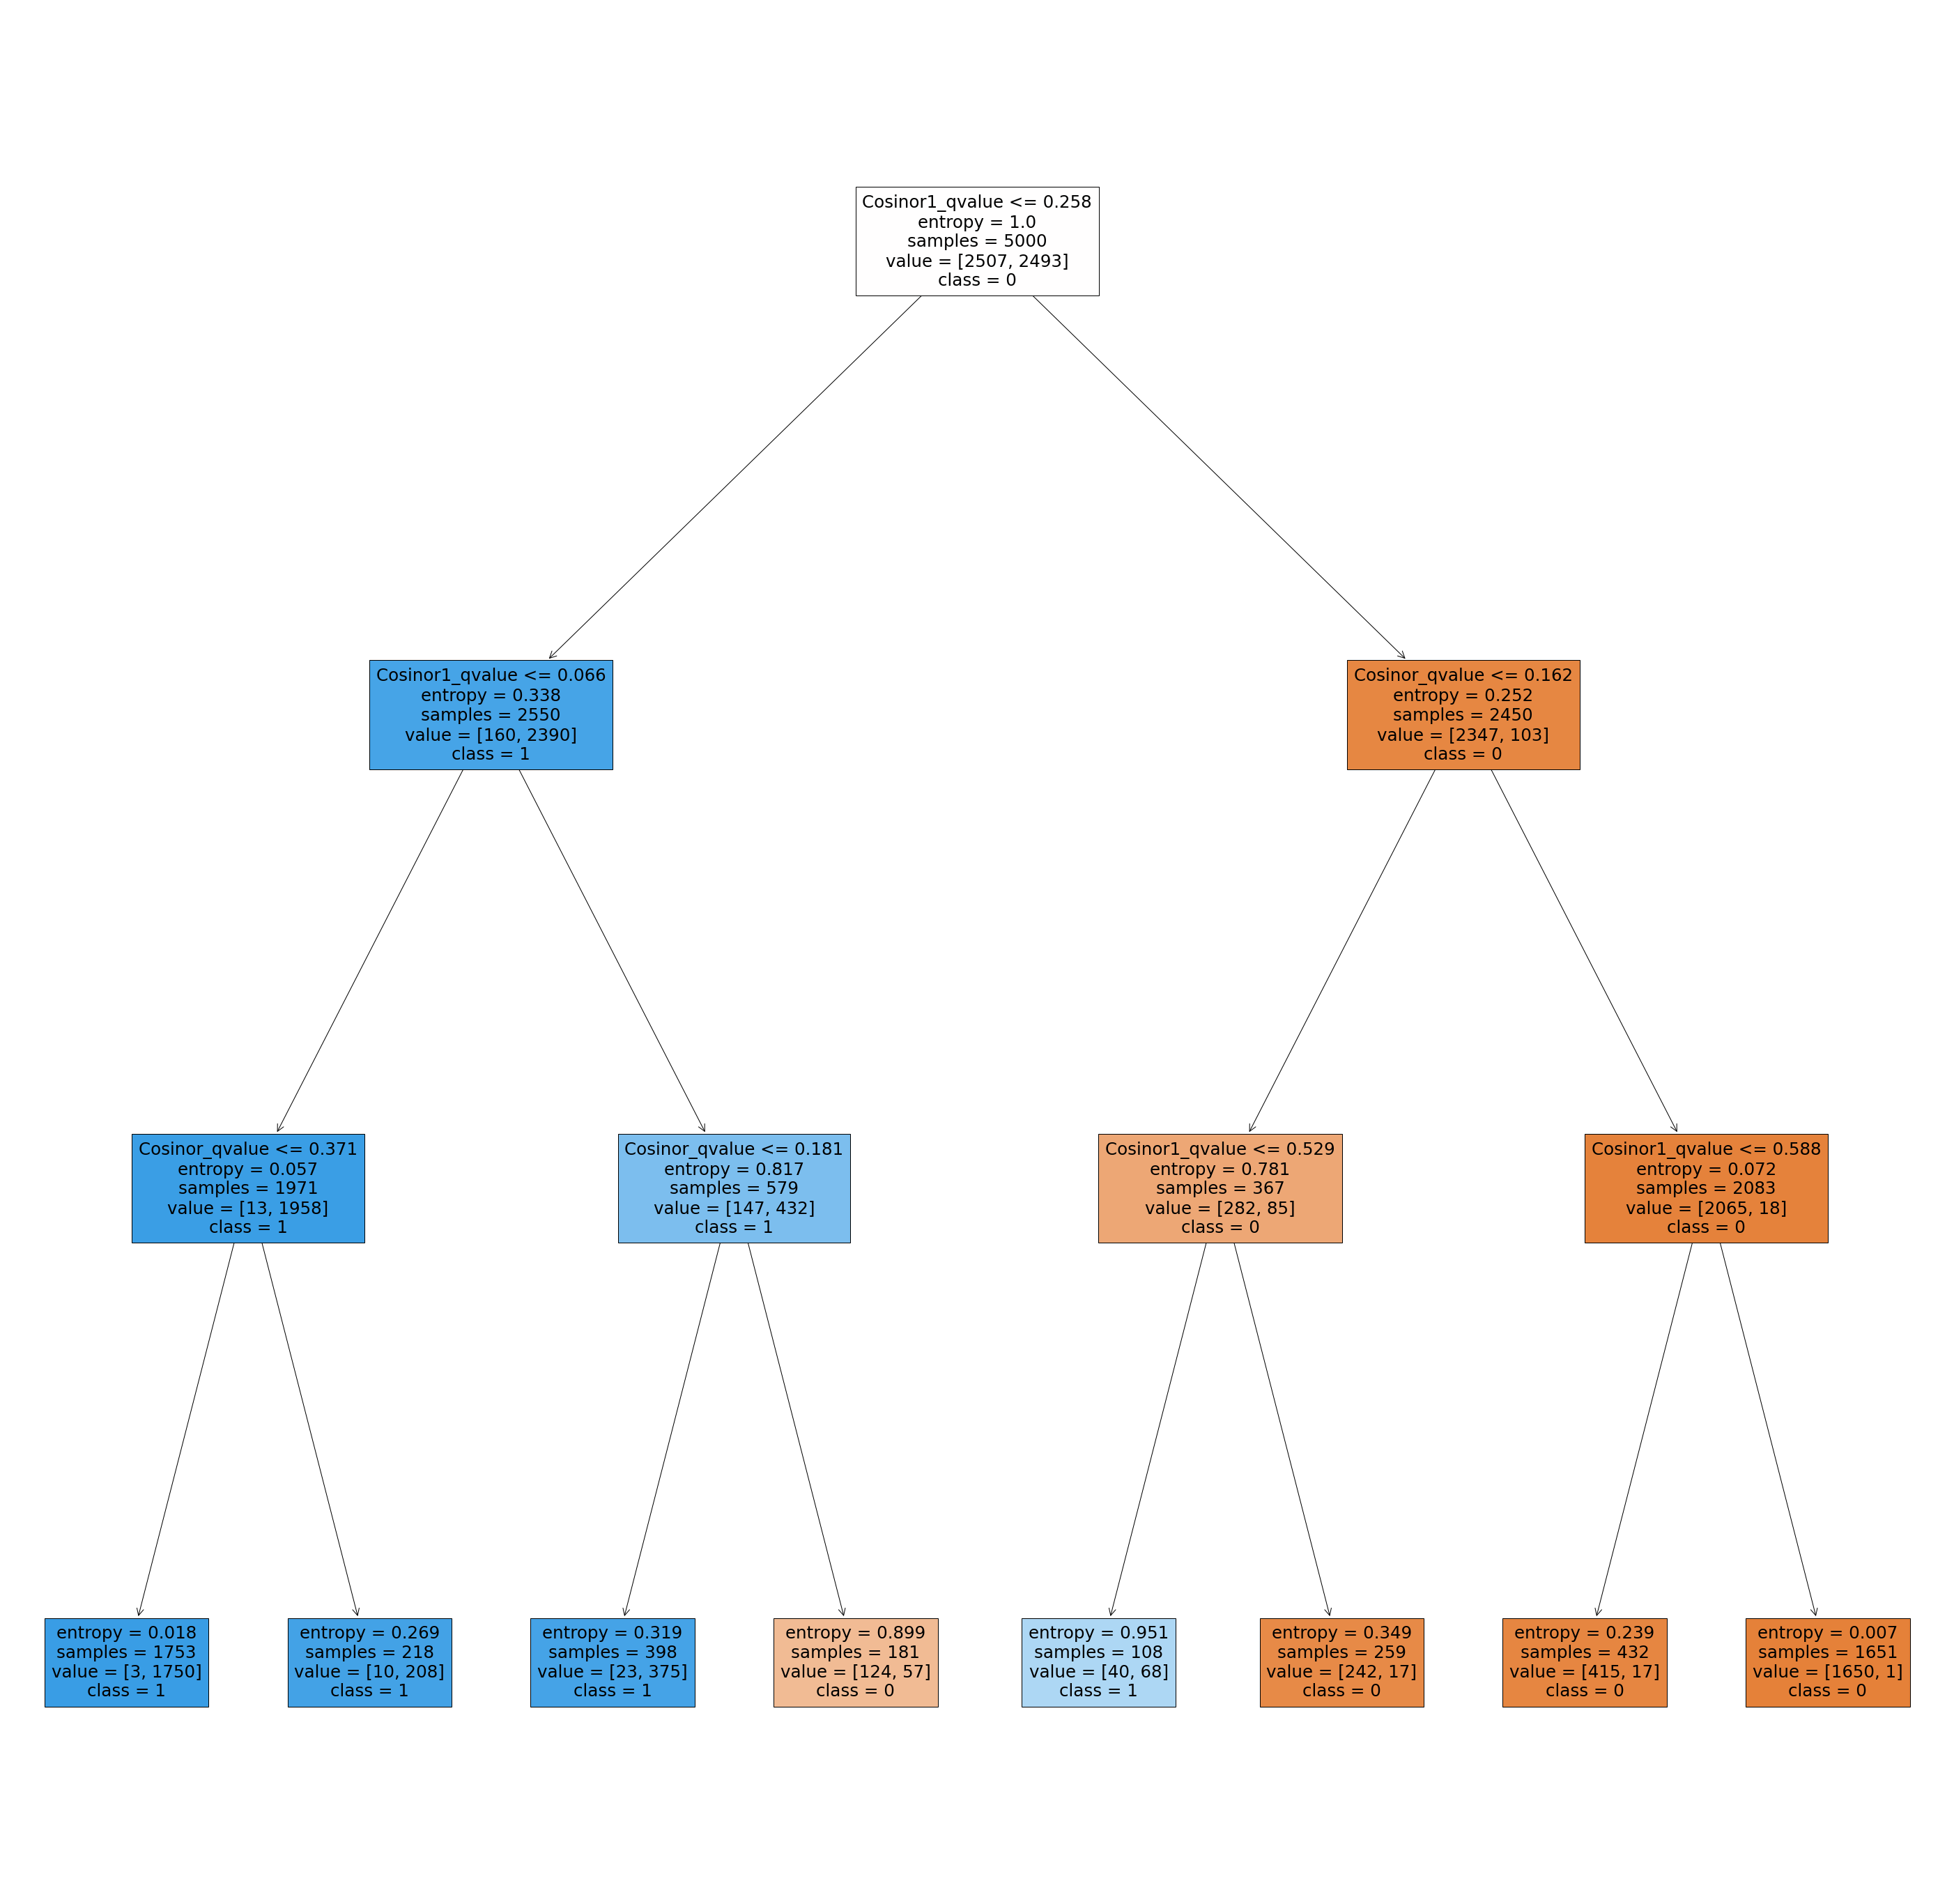

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier()
params = {
           'max_depth': [3],
           'min_samples_leaf': [1,10,30,70],
           'criterion':['gini','entropy']
    }
grid = GridSearchCV(clf,param_grid=params,cv=3)
grid.fit(X_train, y_train)

#Get the confusion matrix
plot_result(grid,X_test,y_test)
fig = plt.figure(figsize=(50,50))
plot_tree(grid.best_estimator_, feature_names=X_test.columns,  
                   class_names=['0','1'],
                   filled=True)
fig.savefig("decistion_tree.png", facecolor='white')

In [ ]:
import xgboost as xgb

clf = xgb.XGBClassifier(objective='binary:logistic',eval_metric='mlogloss',use_label_encoder=False )
params = {
           'n_estimators':[250,350],
           'max_depth': [10,70,100],
           'learning_rate': [0.1,1]
}

grid = GridSearchCV(clf, param_grid=params,verbose=1,return_train_score=True,scoring='f1_micro',cv=3)
grid.fit(X_train, y_train)
plot_result(grid,X_test,y_test)
#Get the confusion matrix


In [ ]:
import pandas as pd
df_metrics= pd.DataFrame()
for i in [1,2,3]:
    for j in [1,2,3]:
        filename=f"stack_c{i}_n0{3*j}.csv"
        df_tmp = pd.read_csv(f"Out/{filename[:-4]}/qv_metrics_{filename[:-4]}.csv")
        df_tmp['filename']=filename
        df_metrics =pd.concat([df_metrics,df_tmp])
df_metrics